# The Battle of Neighborhoods (Week 2)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

JJK Enterprises is an African Based Company that want to set up a branch of the company in New York. However, there are some challenges that the company evisage they will experience in opening a branch in New York. One of the challenges is deciding the best neighborhood for their employees who will be relocating from Africa to stay in order to be able to get African delicacies. They are considering which Borough in New York would be the appropriate place to set up their own african restaurant. Consequently, they have hired me to help them come up with solutions using my data science skills to make recommendations.

New York City (NYC), also known as the City of New York or simply New York (NY), is the most populous city in the United States. With an estimated 2018 population of 8,398,748 distributed over a land area of about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States.<p>
    
The African population in New York has been growing steadily and therefore, this provides a business opportunity. Many africans yearn for their own type of food and are willing to spend money when they visit any nearby African Restaurants to purchase african delicacies. Currently, there are not enough African Restaurants in New York to meet the needs of the African population and this represents a viable opportunity for food business owners or other stakeholders with interest in the food industry.<p>
    
To take advantage of this business opportunity, JJK Enterprises an African based company set to open up an branch in New York city has decided to set up an African Restaurant in one of the Neighborhoods in New York. However, JJK Enterprises is not sure of the best location to set up this African Restaurant and has hired me to identify the best neigbhorhood to set up this African Restaurant.<p>
    
This project is important because locating the best neighborhood to stay will determine to a large extent if the africans relocating from Africa to New York will enjoy their experience while working in New York. Again, identifying the best location for JJK Enterprises to set up an African restaurant is essential for profitability.

## Data <a name="data"></a>

Data to be used includes the following:<br>
1. New York city Data which contains borough, neighborhood, longitude and latitude will be obtained from <a href='https://cocl.us/new_york_dataset'>New York City Data</a>. The data will be cleaned, and then read it into a pandas dataframe so that it is in a structured format.<p>
  
2. New York Venue Categories Data which contains the African venues present in each of the neighborhoods in New York city. I will use Foursquare API to explore the neighborhoods and extract the most common venue categories in each neighbourhood.

## Methodology <a name="methodology"></a>

For this project I took the following steps:
* Collected the new york city data from <a href='https://cocl.us/new_york_dataset'>New York City Data</a>.
* Used FourSquare API we will find all venues for each neighborhood.
* I Filtered out all venues that are African Resturants.
* I found rating , tips and like count for each African Resturants using FourSquare API.
* I used rating for each resturant and then sorted that data.
* I visualized the Ranking of neighborhoods using folium library(python)

## Analysis <a name="analysis"></a>

### Install and Import all Required Libraries

In [3]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from bs4 import BeautifulSoup
import lxml
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

### We define a function to intract with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude. <p> 
    
### Below function will return us the venue id , venue name and category.

In [65]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = '#######' # changed my Foursquare ID
    CLIENT_SECRET = '#######' # changed Foursquare Secret
    VERSION = '20202002' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

### Now we will define a function to get venue details like like count , rating , tip counts for a given venue id. This will be used for ranking.

In [66]:
def get_venue_details(venue_id):
        
    CLIENT_ID = '########' # i have changed the id with ##
    CLIENT_SECRET = '########' # i have changed the secret with ##
    VERSION = '20202002' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

### Now we define a funtion to get the new york city data such as Boroughs, Neighborhoods along with their latitude and longitude.

In [58]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [59]:
# get new york data
new_york_data=get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [60]:
#Check Shape of New York Data
new_york_data.shape

(306, 4)

### Use geopy library to get the latitude and longitude values of New York City.

In [78]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### Create a map of New York with neighborhoods superimposed on top

In [79]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(new_york_data['Latitude'], new_york_data['Longitude'], new_york_data['Borough'], new_york_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Now we will collect African resturants for each Neighborhood

In [67]:
# prepare neighborhood list that contains african resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
african_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    african_resturants=venues[venues['Category']=='African Restaurant']   
    print('(',count,'/',len(new_york_data),')','African Resturants in '+Neighborhood+', '+Borough+':'+str(len(african_resturants)))
    for resturant_detail in african_resturants.values.tolist():
        id, name , category=resturant_detail
        african_rest_ny = african_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

done
( 1 / 306 ) African Resturants in Wakefield, Bronx:0
done
( 2 / 306 ) African Resturants in Co-op City, Bronx:0
done
( 3 / 306 ) African Resturants in Eastchester, Bronx:0
done
( 4 / 306 ) African Resturants in Fieldston, Bronx:0
done
( 5 / 306 ) African Resturants in Riverdale, Bronx:0
done
( 6 / 306 ) African Resturants in Kingsbridge, Bronx:0
done
( 7 / 306 ) African Resturants in Marble Hill, Manhattan:0
done
( 8 / 306 ) African Resturants in Woodlawn, Bronx:0
done
( 9 / 306 ) African Resturants in Norwood, Bronx:0
done
( 10 / 306 ) African Resturants in Williamsbridge, Bronx:0
done
( 11 / 306 ) African Resturants in Baychester, Bronx:0
done
( 12 / 306 ) African Resturants in Pelham Parkway, Bronx:0
done
( 13 / 306 ) African Resturants in City Island, Bronx:0
done
( 14 / 306 ) African Resturants in Bedford Park, Bronx:0
done
( 15 / 306 ) African Resturants in University Heights, Bronx:2
done
( 16 / 306 ) African Resturants in Morris Heights, Bronx:0
done
( 17 / 306 ) African R

In [68]:
#View Table with African Resturants
african_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,University Heights,4c2f8b1b7cc0c9b6a1eaeb9a,Accra Resturant
1,Bronx,University Heights,4cb2beaadedbef3bca7c9d40,Papaye Restaurant
2,Bronx,Fordham,4cb2beaadedbef3bca7c9d40,Papaye Restaurant
3,Bronx,Belmont,4cb2beaadedbef3bca7c9d40,Papaye Restaurant
4,Brooklyn,Crown Heights,51d4d2cc454a777ed5a76c57,Cafe Rue Dix


In [69]:
#View the Shape of the 
african_rest_ny.shape

(12, 4)

<b>There are 12 African Restaurants across New York City<b>

### Generate a Barchart Showing Number of African Restaurants for Each Borough in New York City

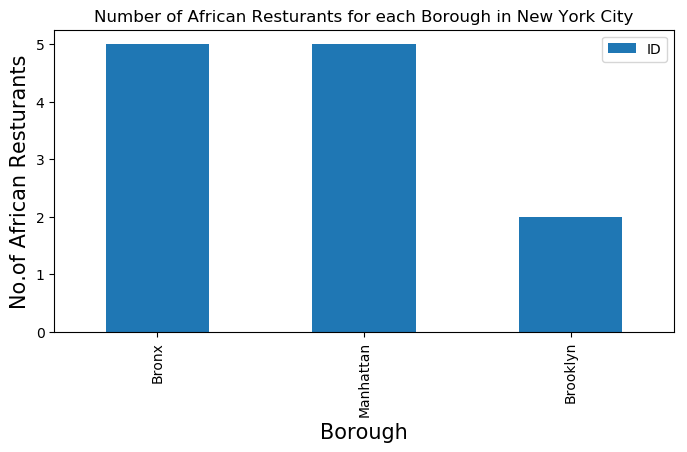

In [86]:
plt.figure(figsize=(8,4), dpi = 100)
# title
plt.title('Number of African Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of African Resturants', fontsize=15)
#giving a bar plot
african_rest_ny.groupby('Borough')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

<b> Bronx and Manhattan have the large number of African Restaurants<b>

### Comparing the African American Population in the Three Boroughs

In [90]:
dd = pd.DataFrame({'Brooklyn': [36.4],
                   'Bronx': [29.9],
                   'Manhattan': [17.4]})
dd

,Brooklyn,Bronx,Manhattan
0,36.4,29.9,17.4


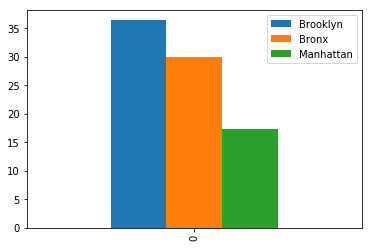

In [96]:
dd.plot(kind='bar')

#### Brooklyn has the largest percentage of African Anericans yet has only two African Resturants. Brooklyn is thus a good location to set an African Restaurant.

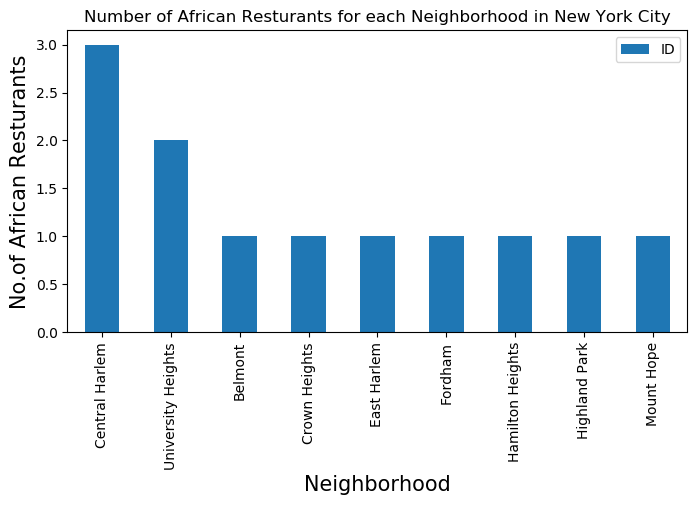

In [85]:
plt.figure(figsize=(8,4), dpi = 100)
# title
plt.title('Number of African Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of African Resturants', fontsize=15)
#giving a bar plot
african_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [98]:
african_rest_ny[african_rest_ny['Neighborhood']=='Central Harlem']

,Borough,Neighborhood,ID,Name
6,Manhattan,Central Harlem,53e01975498e78c0915599bf,Ponty Bistro Harlem
7,Manhattan,Central Harlem,4c2fdced452620a120551e0f,Keur Sokhna
8,Manhattan,Central Harlem,5004a9e5e4b034c2950659fd,Les Ambassades Senegalais Bistro


### So Central Harlem in Manhattan has the highest number of African Resturants with a total count of 3.

### NNow we will get the ranking of each resturant for further analysis.

In [99]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
african_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in african_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(african_rest_ny),')','processed')
    african_rest_stats_ny = african_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID             Name  Likes  Rating  Tips
0  4c2f8b1b7cc0c9b6a1eaeb9a  Accra Resturant      9     7.0     3
( 1 / 12 ) processed
                         ID               Name  Likes  Rating  Tips
0  4cb2beaadedbef3bca7c9d40  Papaye Restaurant     11     7.8     3
( 2 / 12 ) processed
                         ID               Name  Likes  Rating  Tips
0  4cb2beaadedbef3bca7c9d40  Papaye Restaurant     11     7.8     3
( 3 / 12 ) processed
                         ID               Name  Likes  Rating  Tips
0  4cb2beaadedbef3bca7c9d40  Papaye Restaurant     11     7.8     3
( 4 / 12 ) processed
                         ID          Name  Likes  Rating  Tips
0  51d4d2cc454a777ed5a76c57  Cafe Rue Dix    201     8.6    59
( 5 / 12 ) processed
                         ID                 Name  Likes  Rating  Tips
0  53e01975498e78c0915599bf  Ponty Bistro Harlem    104     8.6    30
( 6 / 12 ) processed
                         ID                 Name  Likes  Rating  Tip

In [100]:
#View the head of data
african_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,University Heights,4c2f8b1b7cc0c9b6a1eaeb9a,Accra Resturant,9,7.0,3
1,Bronx,University Heights,4cb2beaadedbef3bca7c9d40,Papaye Restaurant,11,7.8,3
2,Bronx,Fordham,4cb2beaadedbef3bca7c9d40,Papaye Restaurant,11,7.8,3
3,Bronx,Belmont,4cb2beaadedbef3bca7c9d40,Papaye Restaurant,11,7.8,3
4,Brooklyn,Crown Heights,51d4d2cc454a777ed5a76c57,Cafe Rue Dix,201,8.6,59


In [105]:
#View the Shape of Data
african_rest_stats_ny.shape

(12, 7)

In [102]:
african_rest_stats_ny.to_csv('african_rest_stats_ny.csv', index=False)

In [103]:
african_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
Borough         12 non-null object
Neighborhood    12 non-null object
ID              12 non-null object
Name            12 non-null object
Likes           12 non-null object
Rating          12 non-null float64
Tips            12 non-null object
dtypes: float64(1), object(6)
memory usage: 752.0+ bytes


#### We see that values like Likes, Tips are strig values. We would need to convert them into float for further analysis

In [106]:
african_rest_stats_ny['Likes']=african_rest_stats_ny['Likes'].astype('float64')
african_rest_stats_ny['Tips']=african_rest_stats_ny['Tips'].astype('float64')

In [107]:
african_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
Borough         12 non-null object
Neighborhood    12 non-null object
ID              12 non-null object
Name            12 non-null object
Likes           12 non-null float64
Rating          12 non-null float64
Tips            12 non-null float64
dtypes: float64(3), object(4)
memory usage: 752.0+ bytes


In [108]:
# Resturant with maximum Likes
african_rest_stats_ny.iloc[african_rest_stats_ny['Likes'].idxmax()]

Borough                         Brooklyn
Neighborhood               Crown Heights
ID              51d4d2cc454a777ed5a76c57
Name                        Cafe Rue Dix
Likes                                201
Rating                               8.6
Tips                                  59
Name: 4, dtype: object

In [109]:
# Resturant with maximum Rating
african_rest_stats_ny.iloc[african_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood               Crown Heights
ID              51d4d2cc454a777ed5a76c57
Name                        Cafe Rue Dix
Likes                                201
Rating                               8.6
Tips                                  59
Name: 4, dtype: object

In [110]:
# Resturant with maximum Tips
african_rest_stats_ny.iloc[african_rest_stats_ny['Tips'].idxmax()]

Borough                         Brooklyn
Neighborhood               Crown Heights
ID              51d4d2cc454a777ed5a76c57
Name                        Cafe Rue Dix
Likes                                201
Rating                               8.6
Tips                                  59
Name: 4, dtype: object

In [136]:
ny_neighborhood_stats=african_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

### Generate the Top Five Neighborhood with Top Average Rating of African Restaurant

In [137]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(5)

,Neighborhood,Average Rating
2,Crown Heights,8.600000
5,Hamilton Heights,8.600000
3,East Harlem,8.500000
1,Central Harlem,7.933333
0,Belmont,7.800000


In [138]:
ny_borough_stats=african_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

### These are the average rating of Indian Resturants for each Borough

In [121]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.18
0,Bronx,7.48
1,Brooklyn,7.30


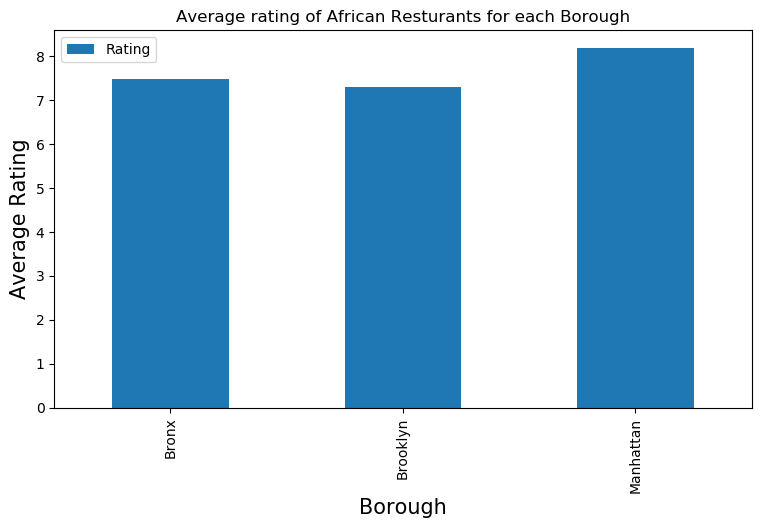

In [122]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of African Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
african_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

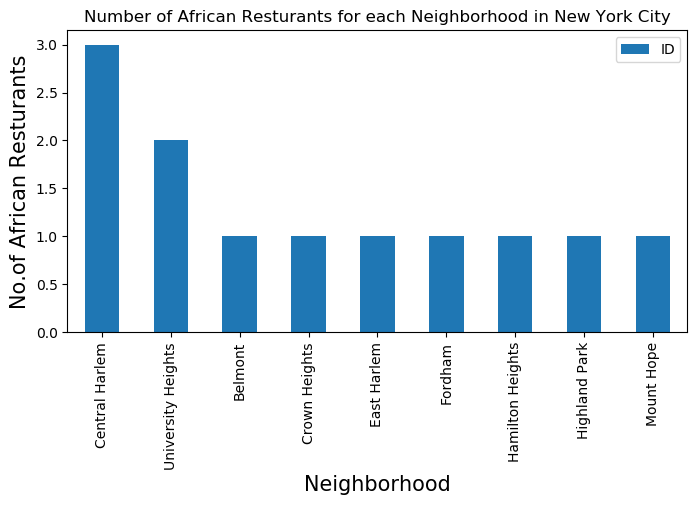

In [151]:
plt.figure(figsize=(8,4), dpi = 100)
# title
plt.title('Number of African Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of African Resturants', fontsize=15)
#giving a bar plot
african_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

### We will consider all the neighborhoods with average rating and visualize on map

#### Join this dataset to original new york data to get lonitude and latitude

In [142]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')
ny_neighborhood_stats

,Neighborhood,Average Rating,Borough,Latitude,Longitude
0,Belmont,7.800000,Bronx,40.857277,-73.888452
1,Central Harlem,7.933333,Manhattan,40.815976,-73.943211
2,Crown Heights,8.600000,Brooklyn,40.670829,-73.943291
3,East Harlem,8.500000,Manhattan,40.792249,-73.944182
4,Fordham,7.800000,Bronx,40.860997,-73.896427
5,Hamilton Heights,8.600000,Manhattan,40.823604,-73.949688
6,Highland Park,6.000000,Brooklyn,40.681999,-73.890346
7,Mount Hope,7.000000,Bronx,40.848842,-73.908299
8,University Heights,7.400000,Bronx,40.855727,-73.910416


In [143]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Bronx,Belmont,40.857277,-73.888452,7.800000
1,Manhattan,Central Harlem,40.815976,-73.943211,7.933333
2,Brooklyn,Crown Heights,40.670829,-73.943291,8.600000
3,Manhattan,East Harlem,40.792249,-73.944182,8.500000
4,Bronx,Fordham,40.860997,-73.896427,7.800000
5,Manhattan,Hamilton Heights,40.823604,-73.949688,8.600000
6,Brooklyn,Highland Park,40.681999,-73.890346,6.000000
7,Bronx,Mount Hope,40.848842,-73.908299,7.000000
8,Bronx,University Heights,40.855727,-73.910416,7.400000


### Visualize the Average Rating by Neighbourhood on a Map

In [132]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [145]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [146]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

In [147]:
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [148]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [149]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

## Results and Discussion <a name="results"></a>

In all, there were a total of twelve african american restaurants in New York city and the three are located in the following boroughs: Bronx, Manhattan and Brooklyn. <p>

The analysis shows that Bronx and Manhattan has the highest number of African Restaurants with each of them having five african restaurants. Although Brookyln has the largest population of African Americans in New York, it still has fewer African Restaurants than Bronx and Manhattan. Therefore, setting up another African Restaurant in Brooklyn could prove to be a profitable venture. <p>
    
In considering which location new employees of JJK Enterprises may stay, Central Harlem in Manhattan may prove to be a good choice since it has the highest number of African Restaurants. However, when considering the neighbourhood with the best average rating, Crown Heights in Brookyln and Halmiton Heights in Manhattan are the best locations to live in order to enjoy the best African declicacies. The results show that Crown Heights and Hamilton Heights had an average rating of 8.6.
   




## Conclusion <a name="conclusion"></a>

In conclusion, my recommendation to JJK Enterprises is that they should take advantage of a potential business opportunity by setting up an African Restaurant in Brookyln with its large population of Black and African Americans.<p>

For their new employees coming from Africa, I recommend that they get accommodation in Central Harlem of Manhattan if they want to have more choices of African Restaurants. But for those of them that are place value of reviews and ratings, I would recommend they get accomodation in Crown Heights of Brooklyn or Halmiton Heights of Manhattan.